In [1]:
# %matplotlib inline #特殊点用了%， 这说明作者用的jupyter notebook 在写代码；放在其他地方运行可能就不成功会报错
from xmitgcm import open_mdsdataset #按照这个xmitgcm 的库很方便
import xgcm
import xarray as xr
import matplotlib.pyplot as plt
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import numpy as np
import os

In [2]:
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na"
dirs = os.listdir(data_dir)
dirs.sort()
for file in dirs:
#     if os.path.splitext(file)[1] == ".bin":
    print(file)

857.node100-34D8397DEE423E6DD43A6952C276AEFA.hosts
858.node100-A295F4E7B9D3FDE62E10A17F34949681.hosts
859.node100-8A27897A1144F0D8143D71241FD386EE.hosts
860.node100-9647DCD856AB8A69CDDBCF517CA21E8E.hosts
861.node100-9615F5023E629010C58221977D23B40C.hosts
862.node100-2261D2EC7443FB656C1A1745B10CC2DD.hosts
863.node100-E6EC5FC3E838BD01FE4B550DD6F0869F.hosts
Basin_Mask.bin
Basin_Mask_ShorterPAC.bin
DRC.data
DRC.meta
DRF.data
DRF.meta
DXC.data
DXC.meta
DXG.data
DXG.meta
DYC.data
DYC.meta
DYG.data
DYG.meta
Depth.data
Depth.meta
EmP.bin
EmP_DryPAC.bin
EmP_Hosing.bin
EmP_ShorterPAC.bin
EmP_ShorterPAC_Hosing.bin
Eta.0000000000.data
Eta.0000000000.meta
Eta.0000172800.data
Eta.0000172800.meta
Eta.0000345600.data
Eta.0000345600.meta
Eta.0000518400.data
Eta.0000518400.meta
Eta.0000691200.data
Eta.0000691200.meta
Eta.0000864000.data
Eta.0000864000.meta
Eta.0001036800.data
Eta.0001036800.meta
Eta.0001209600.data
Eta.0001209600.meta
Eta.0001382400.data
Eta.0001382400.meta
Eta.0001555200.data
Eta.00015

# Wind Stress - SST

[Text(0, 0, '0'), Text(10, 0, '10'), Text(20, 0, '20'), Text(30, 0, '30')]

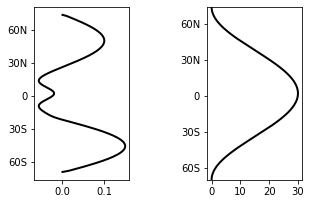

In [36]:
dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/taux.bin"
data = np.fromfile(dir, dtype='>f4')
wind1 = np.reshape(data, (144,240))

dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/sst.bin"
data = np.fromfile(dir, dtype='>f4')
sst = np.reshape(data, (144,240))

fig = plt.figure(figsize=(6, 12))
yy = np.arange(0.5, 144, 1)
# # yy2 = np.arange(0.05, 60, 0.1)
# # yy3 = np.arange(0.03125/2, 60, 0.03125)

# ax1 = plt.subplot(121)
ax1=fig.add_axes([0.1,0.1,0.22,0.2]) 
ax2=fig.add_axes([0.5,0.1,0.22,0.2]) 

ax1.plot(wind1[:,10],yy, 'k-', linewidth=2, label='W0')
ax2.plot(sst[:, 10], yy, 'k-', linewidth=2, label='W1')
# ax1.plot(wind3[:, 10], yy, 'k:', linewidth=2, label='W2')

# plt.legend(loc=4, fontsize=16)
# plt.grid()
# plt.xlim(-0.07, 0.17)
plt.ylim(0, 144)
# ax1.xlabel('$N/m^2$', size=12)
# plt.ylabel('LAT', size=12)
x_ticks = np.arange(0,32,10)
y_ticks = np.arange(10, 140, 30)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(['0','10','20','30'],fontsize=10)
# plt.title('Wind stress', size=18)
# plt.text(-0.07, 72.5,'(a) Wind', size=10)
# plt.text(-0.07, 72.5,'(a) Wind', size=10)

In [36]:
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
TRACE = ds1.TRAC01
TRACE

<xarray.DataArray 'TRAC01' (time: 94, Z: 30, YC: 144, XC: 240)>
dask.array<concatenate, shape=(94, 30, 144, 240), dtype=float32, chunksize=(1, 30, 144, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
  * YC       (YC) >f4 -71.5 -70.5 -69.5 -68.5 -67.5 ... 67.5 68.5 69.5 70.5 71.5
  * Z        (Z) >f4 -10.0 -30.0 -50.0 ... -3.375e+03 -3.625e+03 -3.875e+03
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 0 days 2 days 4 days ... 184 days 186 days
Attributes:
    standard_name:  TRAC01
    long_name:      Tracer 0001 concentration
    units:          kg/kg

In [5]:
#READ SURFACE TRACER of the deep Atlantic ocean
# T=3
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
# TRACE = ds1.TRAC01
# TRACE
tracer3 = ds1.TRAC01[:,17:28,50:130,0:50] #17:28(dep:1300-3625m);30:130(lat:21.5S-58.5N);
# T= 2
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex2/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
# TRACE = ds1.TRAC01
# TRACE
tracer2 = ds1.TRAC01[:,17:28,50:130,0:50]
# T=1
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
# TRACE = ds1.TRAC01
# TRACE
tracer1 = ds1.TRAC01[:,17:28,50:130,0:50]
tracer3

<xarray.DataArray 'TRAC01' (time: 98, Z: 11, YC: 80, XC: 50)>
dask.array<getitem, shape=(98, 11, 80, 50), dtype=float32, chunksize=(1, 11, 80, 50), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 44.5 45.5 46.5 47.5 48.5 49.5
  * YC       (YC) >f4 -21.5 -20.5 -19.5 -18.5 -17.5 ... 53.5 54.5 55.5 56.5 57.5
  * Z        (Z) >f4 -1.3e+03 -1.46e+03 -1.62e+03 ... -3.125e+03 -3.375e+03
    rA       (YC, XC) >f4 dask.array<chunksize=(80, 50), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(80, 50), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(11,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(11,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(11, 80, 50), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(11, 80, 50), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(11,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 0 days 2 days 4 days ... 192 days 194 days
Attributes:
    standard_name:  TRAC01
    long_name:      Tracer 0001 concentration
    units:          kg/kg

/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be 

Text(0, 2.75, '(c)tracer 3')

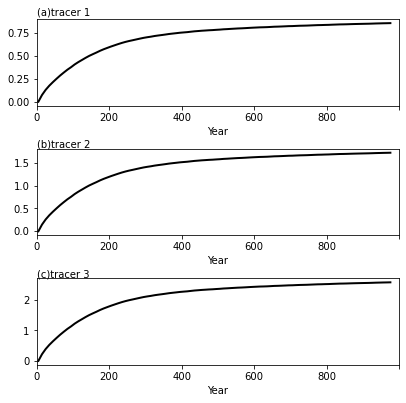

In [18]:
# 绘制TRACER空间分布图
fig1 = plt.figure(figsize=(12, 6))
ax1=fig1.add_axes([0.1,0.7,0.42,0.2]) #左、底、宽、高
ax2=fig1.add_axes([0.1,0.4,0.42,0.2]) #左、底、宽、高
ax3=fig1.add_axes([0.1,0.1,0.42,0.2]) #左、底、宽、高

t1 = tracer1.mean('XC').mean('YC').mean('Z')
t2 = tracer2.mean('XC').mean('YC').mean('Z')
t3 = tracer3.mean('XC').mean('YC').mean('Z')

ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax3.set_xlim(0,100)

ax1.set_xticklabels(np.arange(0, 121, 20))
ax1.set_xticklabels(np.arange(0, 1000, 200))
ax2.set_xticklabels(np.arange(0, 121, 20))
ax2.set_xticklabels(np.arange(0, 1000, 200))
ax3.set_xticklabels(np.arange(0, 121, 20))
ax3.set_xticklabels(np.arange(0, 1000, 200))

yy = np.arange(0.5, 98, 1)
ax1.plot(yy,t1, 'k-', linewidth=2, label='W0')
ax2.plot(yy,t2, 'k-', linewidth=2, label='W0')
ax3.plot(yy,t3, 'k-', linewidth=2, label='W0')


# fig1.colorbar(h1,ax=ax1)
# fig1.colorbar(h2,ax=ax2)
# fig1.colorbar(h3,ax=ax3)
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax3.set_xlabel('Year')

ax1.text(0, 0.95, '(a)tracer 1', size=10)
ax2.text(0, 1.83, '(b)tracer 2', size=10)
ax3.text(0, 2.75, '(c)tracer 3', size=10)

# plt.xlim(0, 240)

# x_ticks = np.arange(0, 240, 60)
# y_ticks = np.arange(10, 140, 30)
# ax1.set_yticks(y_ticks)
# ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)

# LAT-LON (SURFACE)

In [3]:
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
TRACE = ds1.TRAC01
TRACE

<xarray.DataArray 'TRAC01' (time: 94, Z: 30, YC: 144, XC: 240)>
dask.array<concatenate, shape=(94, 30, 144, 240), dtype=float32, chunksize=(1, 30, 144, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
  * YC       (YC) >f4 -71.5 -70.5 -69.5 -68.5 -67.5 ... 67.5 68.5 69.5 70.5 71.5
  * Z        (Z) >f4 -10.0 -30.0 -50.0 ... -3.375e+03 -3.625e+03 -3.875e+03
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(30, 144, 240), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(30,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 0 days 2 days 4 days ... 184 days 186 days
Attributes:
    standard_name:  TRAC01
    long_name:      Tracer 0001 concentration
    units:          kg/kg

In [10]:
#READ SURFACE TRACER
# T=3
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer3 = ds1.TRAC01[97:100,0,:,:].mean('time') #10year output
tracer3.to_netcdf('tracer_ex3_30clim_dep10m.nc')
# T= 2
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex2/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer2 = ds1.TRAC01[97:100,0,:,:].mean('time')
tracer2.to_netcdf('tracer_ex2_30clim_dep10m.nc')
# T=1
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer1 = ds1.TRAC01[97:100,0,:,:].mean('time')
tracer1.to_netcdf('tracer_ex1_30clim_dep10m.nc')
tracer1

<xarray.DataArray 'TRAC01' (YC: 144, XC: 240)>
dask.array<mean_agg-aggregate, shape=(144, 240), dtype=float32, chunksize=(144, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
  * YC       (YC) >f4 -71.5 -70.5 -69.5 -68.5 -67.5 ... 67.5 68.5 69.5 70.5 71.5
    Z        >f4 -10.0
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    drF      >f4 dask.array<chunksize=(), meta=np.ndarray>
    PHrefC   >f4 dask.array<chunksize=(), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(144, 240), meta=np.ndarray>
    rhoRef   >f4 dask.array<chunksize=(), meta=np.ndarray>

/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  if __name__ == "__main__":
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  # Remove the CWD from sys.path while we load stuff.


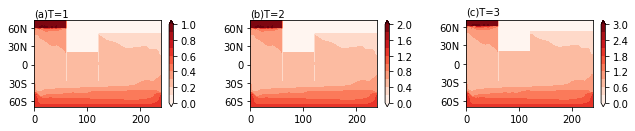

In [11]:
# 绘制TRACER空间分布图
fig1 = plt.figure(figsize=(10, 6))
ax1=fig1.add_axes([0.1,0.1,0.22,0.2]) #左、底、宽、高
ax2=fig1.add_axes([0.4,0.1,0.22,0.2])
ax3=fig1.add_axes([0.7,0.1,0.22,0.2])
# ax0=fig1.add_axes([0.18,0.0,0.42,0.025])
# plt.subplot(211)
h1 = ax1.contourf(tracer1, cmap="Reds",  levels=np.arange(0.,1.1,0.1),extend="both",add_colorbar=True)
h2 = ax2.contourf(tracer2, cmap="Reds",  levels=np.arange(0,2.2,0.2),extend="both",add_colorbar=True)
h3 = ax3.contourf(tracer3, cmap="Reds",  levels=np.arange(0,3.3,0.3),extend="both",add_colorbar=True)

fig1.colorbar(h1,ax=ax1)
fig1.colorbar(h2,ax=ax2)
fig1.colorbar(h3,ax=ax3)

ax1.text(0, 150, '(a)T=1', size=10)
ax2.text(0, 150, '(b)T=2', size=10)
ax3.text(0, 150, '(c)T=3', size=10)

plt.xlim(0, 240)
plt.ylim(0, 140)
x_ticks = np.arange(0, 240, 60)
y_ticks = np.arange(10, 140, 30)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax3.set_yticks(y_ticks)
ax3.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)

# s=size; cmap=plt.cm.get_cmap("cool",100) 100 是颜色的划分；
# extend="both" colorbar 两侧扩展；
# pad= colorbar 与图之间的距离，值越大离得越远
# shrink= colorbar 长度的收缩，正常是1，比1大是放大，比1小是缩小
# aspect= colorbar 的宽度，值越小越胖
# format= colorbar 值的格式
# pad=0.05,shrink=0.8,aspect=20,format="%.2f"
# cbar = plt.colorbar(h3, orientation = "horizontal",extend="both",shrink=1.3)
# colorbar 的title
# cbar.set_label(label="concentration",size=12)
# cbar.set_ticks([0,5,10])
# cbar.set_ticklabels(["Small","Middle","Large"])
# cbar.ax.tick_params(labelsize = 10)
# colorbar 的上下限plt.clim(0,3)

fig1.savefig('MITgcm_tracer3.pdf',format='pdf',dpi=300)#输出

# # LAT-LON (DEEP OCEAN)

In [12]:
#READ SURFACE TRACER
# T=3
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer3 = ds1.TRAC01[97:100,17:27,:,:].mean('time').mean('Z')#Deep averaged from 1Km-3Km
tracer3.to_netcdf('tracer_ex3_30clim_dep13km.nc')
# T= 2
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex2/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer2 = ds1.TRAC01[97:100,17:27,:,:].mean('time').mean('Z')
tracer2.to_netcdf('tracer_ex2_30clim_dep13km.nc')
# T=1
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer1 = ds1.TRAC01[97:100,17:27,:,:].mean('time').mean('Z')
tracer1.to_netcdf('tracer_ex1_30clim_dep13km.nc')
tracer1


<xarray.DataArray 'TRAC01' (YC: 144, XC: 240)>
dask.array<mean_agg-aggregate, shape=(144, 240), dtype=float32, chunksize=(144, 240), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 0.5 1.5 2.5 3.5 4.5 5.5 ... 235.5 236.5 237.5 238.5 239.5
  * YC       (YC) >f4 -71.5 -70.5 -69.5 -68.5 -67.5 ... 67.5 68.5 69.5 70.5 71.5
    rA       (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(144, 240), meta=np.ndarray>

/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  if __name__ == "__main__":
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  # Remove the CWD from sys.path while we load stuff.


[Text(0, 10, '60S'),
 Text(0, 40, '30S'),
 Text(0, 70, '0'),
 Text(0, 100, '30N'),
 Text(0, 130, '60N')]

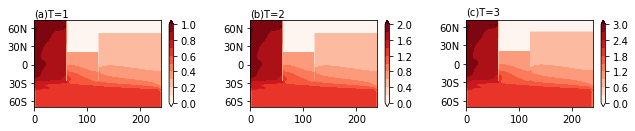

In [13]:
# 绘制TRACER空间分布图
fig1 = plt.figure(figsize=(10, 6))
ax1=fig1.add_axes([0.1,0.1,0.22,0.2]) #左、底、宽、高
ax2=fig1.add_axes([0.4,0.1,0.22,0.2])
ax3=fig1.add_axes([0.7,0.1,0.22,0.2])
# ax0=fig1.add_axes([0.18,0.0,0.42,0.025])
# plt.subplot(211)
h1 = ax1.contourf(tracer1, cmap="Reds",  levels=np.arange(0.,1.1,0.1),extend="both",add_colorbar=True)
h2 = ax2.contourf(tracer2, cmap="Reds",  levels=np.arange(0,2.2,0.2),extend="both",add_colorbar=True)
h3 = ax3.contourf(tracer3, cmap="Reds",  levels=np.arange(0,3.3,0.3),extend="both",add_colorbar=True)

fig1.colorbar(h1,ax=ax1)
fig1.colorbar(h2,ax=ax2)
fig1.colorbar(h3,ax=ax3)

ax1.text(0, 150, '(a)T=1', size=10)
ax2.text(0, 150, '(b)T=2', size=10)
ax3.text(0, 150, '(c)T=3', size=10)

plt.xlim(0, 240)
plt.ylim(0, 140)
x_ticks = np.arange(0, 240, 60)
y_ticks = np.arange(10, 140, 30)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
ax3.set_yticks(y_ticks)
ax3.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)

# LAT-DEPTH (Atlantic)

In [12]:
#READ lat-depth tracer data Atlantic
# T=3
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex3/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
tracer30 = ds1.TRAC01[95:,:,:,1:60].mean('time').mean('XC')
tracer30
tracer30.to_netcdf('tracer_ex3_95:98clim_dep_atl.nc')
# T= 2
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na_ex2/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
# TRACE = ds1.TRAC01
# TRACE
tracer20 = ds1.TRAC01[95:,:,:,1:60].mean('time').mean('XC')
tracer20.to_netcdf('tracer_ex2_95-98clim_dep_atl.nc')
# T=1
data_dir = "/data2/home/liutongya/model/sun_model/MITgcm/verification/global/run_tracer_na/"
ds1 = open_mdsdataset(data_dir,prefix={'tracer'}).chunk()
# TRACE = ds1.TRAC01
# TRACE
tracer10 = ds1.TRAC01[95:,:,:,1:60].mean('time').mean('XC')
tracer10.to_netcdf('tracer_ex1_95-98clim_dep_atl.nc')

/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  # This is added back by InteractiveShellApp.init_path()
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  if sys.path[0] == "":
/data/home/zsp/.conda/envs/lfy/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  


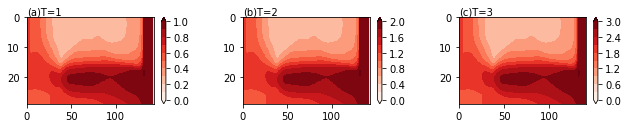

In [13]:
# 绘制TRACER LAT-DEPTH分布图
fig1 = plt.figure(figsize=(10, 6))
ax1=fig1.add_axes([0.1,0.1,0.22,0.2]) #左、底、宽、高
ax2=fig1.add_axes([0.4,0.1,0.22,0.2])
ax3=fig1.add_axes([0.7,0.1,0.22,0.2])
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
# ax0=fig1.add_axes([0.18,0.0,0.42,0.025])
# plt.subplot(211)
h1 = ax1.contourf(tracer10, cmap="Reds",  levels=np.arange(0.,1.1,0.1),extend="both",add_colorbar=True)
h2 = ax2.contourf(tracer20, cmap="Reds",  levels=np.arange(0,2.2,0.2),extend="both",add_colorbar=True)
# ax3.contourf(tracer3, cmap="bwr",  levels=np.arange(-1.0,1.1,0.1),extend="both",add_colorbar=True)
h3 = ax3.contourf(tracer30, cmap="Reds",  levels=np.arange(0,3.3,0.3),extend="both",add_colorbar=True)
# # h2 = ax1.contour(lon,lat,mdt,levels=[-0.035],colors='k',linewidths=1)
# # h3 = ax1.contour(lon,lat,mdt,levels=[-0.985],colors='k',linewidths=1)

fig1.colorbar(h1,ax=ax1)
fig1.colorbar(h2,ax=ax2)
fig1.colorbar(h3,ax=ax3)

ax1.text(0, -1, '(a)T=1', size=10)
ax2.text(0, -1, '(b)T=2', size=10)
ax3.text(0, -1, '(c)T=3', size=10)

plt.xlim(0, 140)
# plt.ylim(0, 30)
x_ticks = np.arange(0, 140, 20)
# y_ticks = np.arange(10, 140, 30)
# ax1.set_yticks(y_ticks)
# ax1.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
# ax2.set_yticks(y_ticks)
# ax2.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)
# ax3.set_yticks(y_ticks)
# ax3.set_yticklabels(['60S','30S','0','30N','60N'],fontsize=10)

# AMOC strength